In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import pyhf
from pyhf.contrib.viz import brazil

import glob
import mplhep as mp

## Mediador

In [2]:
signalList = sorted(glob.glob("./histogramsM/pt*.csv"))[5:] + sorted(glob.glob("./histogramsM/pt*.csv"))[0:5]

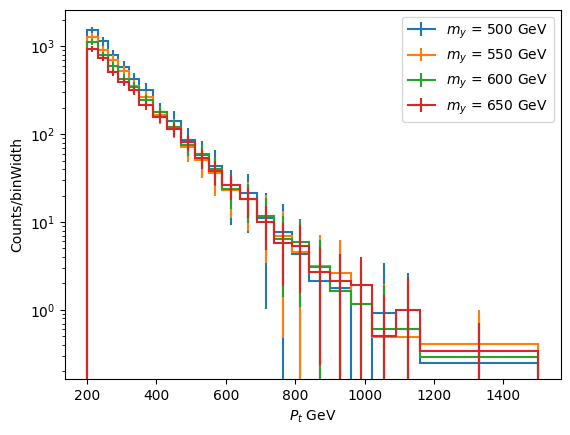

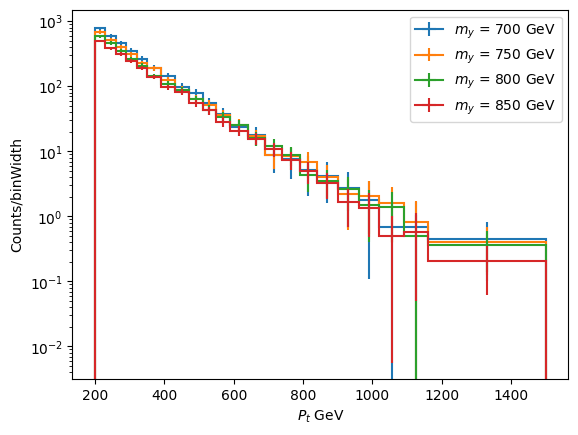

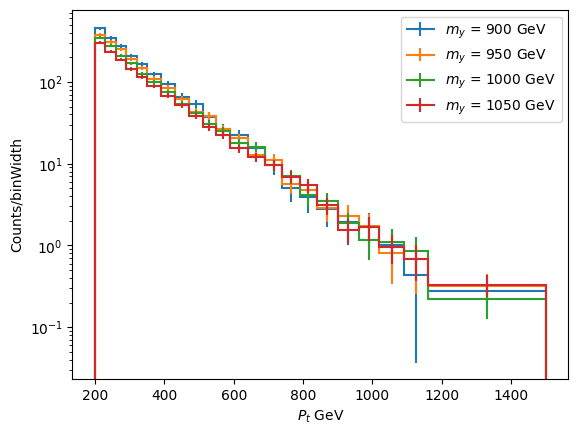

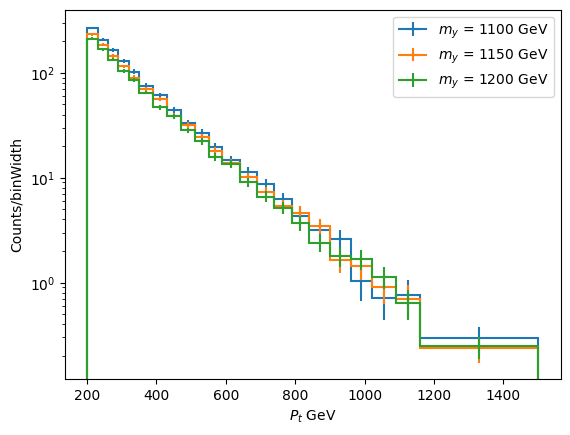

In [3]:
colors = ["black", "brown", "blue", "orange", "crimson", "darkgreen", "darkmagenta", "darkturquoise", "aqua", "palegreen", "gold", "indigo", "lightseagreen", "hotpink"]
def graph(a, b):
    fig = plt.figure()
    m=500 + a*50
    for sig in signalList[a:b]:
        mass = pd.read_csv(sig)
        bins = np.concatenate((mass["bins_lower"], np.asarray([1500])))
        counts = mass["counts"]
        error = mass["error"]
        mp.histplot(counts, bins, yerr = error, label="$m_y$ = {} GeV".format(m), binwnorm = True)
        m+=50

    plt.yscale("log")
    plt.ylabel("Counts/binWidth")
    plt.xlabel("$P_t$ GeV")
    plt.legend()
    # plt.savefig("mass_y_1150-1250.png")
    return fig

figura1 = graph(0,4); figura1.savefig("m_y_500-650.png")
figura2 = graph(4,8); figura2.savefig("m_y_700-850.png")
figura3 = graph(8,12); figura3.savefig("m_y_900-1050.png")
figura4 = graph(12,15); figura4.savefig("m_y_1100-1250.png")

from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('figuras.pdf')
pp.savefig(figura1)
pp.savefig(figura2)
pp.savefig(figura3)
pp.savefig(figura4)
pp.close()

In [3]:
MJData = pd.read_csv("MJData.csv")
MJ_bkg = MJData["MJ_bkg"]
MJ_errbkg = MJData["MJ_errbkg"]
MJ_data = MJData["MJ_data"]
MJ_higgs = MJData["MJ_higgs"]
MJ_axial = MJData["MJ_axial"]

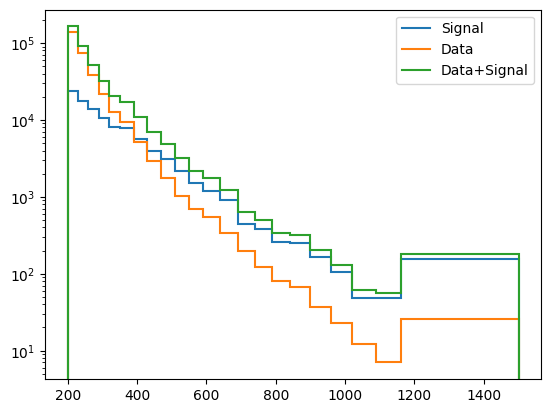

In [34]:
mass = pd.read_csv('./histogramsM/pt_miss_histogram_monojet_BM_toy_my_700_GeV_mDM_10_GeV_gDM_1.csv')
bins = np.concatenate((mass["bins_lower"], np.asarray([1500])))
counts = mass["counts"]
error = mass["error"]
mp.histplot(counts, bins, label = "Signal")
mp.histplot(MJ_data, bins, label = "Data")
mp.histplot(MJ_data+counts, bins, label = "Data+Signal")
plt.yscale("log")
plt.legend()

In [5]:
def signalAnalysis(sigCSV):
    signal = pd.read_csv(sigCSV)["counts"]
    
    bins = np.concatenate((pd.read_csv(sigCSV)["bins_lower"], np.asarray([2000])))
    norm = (bins[1:] - bins[0:-1])*100
    
    Data = (MJ_data + signal)/norm
    model = pyhf.simplemodels.uncorrelated_background(signal=list(signal/norm), bkg=list(MJ_bkg/norm), bkg_uncertainty=list(MJ_errbkg/norm))
    observations = np.concatenate((Data, model.config.auxdata))
    
    poi_values = np.linspace(0.01, 2, 100)
    
    #Mu
    obs_limit, exp_limits, (scan, results) = pyhf.infer.intervals.upper_limits.upper_limit(
    observations, model, poi_values, level=0.05, return_results=True)
    #Confidence level
    CL = pyhf.infer.hypotest(
    1, observations, model, return_expected = True, return_expected_set = True, return_tail_probs = True)
    
    pval = CL[1][0]
    clsb = CL[1][1]
    clb = CL[0]
    cls = CL[2]
    clsSigmas = CL[3]
    
    return obs_limit, exp_limits[2], pval, clsb, clb, cls, clsSigmas

In [5]:
signalAnalysis('./histogramsM/pt_miss_histogram_monojet_BM_toy_my_750_GeV_mDM_10_GeV_gDM_1.csv')

(array(1.74287779),
 array(0.59588998),
 array(0.5),
 array(0.99893963),
 array(0.50053075),
 array(0.00212074),
 [array(8.61631153e-06),
  array(0.0001464),
  array(0.00212074),
  array(0.02269742),
  array(0.14498317)])

In [9]:
f = open("resultados_Mediador.txt", "at")
poi_values1 = np.linspace(0.01, 2, 50)
mass = 500
for signal in signalList:
    obs_limit, exp_limits, pval, clsb, clb, cls, clsSigmas = signalAnalysis(signal)
    
    f.write("================================================================\n")
    f.write("Signal " + str(mass) + "\n")
    f.write(f"    Upper limit (obs): μ = {obs_limit:.4f}")
    f.write(f"    Upper limit (exp): μ = {exp_limits:.4f} \n")
    f.write(f"    p-value = {pval:.8f}\n")
    f.write(f"    CLsb = {clsb:.8f}\n")
    f.write(f"    CLb = {clb:.8f}\n")
    f.write(f"    CLs = {cls:.8f}\n")
    f.write(f"    -2σ = {clsSigmas[0]:.8f}\n")
    f.write(f"    -1σ = {clsSigmas[1]:.8f}\n")
    f.write(f"     0σ = {clsSigmas[2]:.8f}\n")
    f.write(f"     1σ = {clsSigmas[3]:.8f}\n")
    f.write(f"     2σ = {clsSigmas[4]:.8f}\n")
    f.write("================================================================\n")
    mass += 50
f.close()
    

## Dark matter

In [10]:
signalListDM = sorted(glob.glob("./histogramsDM/pt*.csv"))
signalListDM

['./histogramsDM/pt_miss_histogram_monojet_BMtoy.csv',
 './histogramsDM/pt_miss_histogram_monojet_BMtoy_DM_100_GeV.csv',
 './histogramsDM/pt_miss_histogram_monojet_BMtoy_DM_400_GeV.csv']

In [11]:
f = open("resultados_DM.txt", "at")
poi_values1 = np.linspace(0.01, 2, 50)
mass = [1000, 100, 400]
j=0
for signal in signalListDM:
    obs_limit, exp_limits, pval, clsb, clb, cls, clsSigmas = signalAnalysis(signal)
    
    f.write("================================================================\n")
    f.write("Signal " + str(mass[j]) + "\n")
    f.write(f"    Upper limit (obs): μ = {obs_limit:.4f}")
    f.write(f"    Upper limit (exp): μ = {exp_limits:.4f} \n")
    f.write(f"    p-value = {pval:.8f}\n")
    f.write(f"    CLsb = {clsb:.8f}\n")
    f.write(f"    CLb = {clb:.8f}\n")
    f.write(f"    CLs = {cls:.8f}\n")
    f.write(f"    -2σ = {clsSigmas[0]:.8f}\n")
    f.write(f"    -1σ = {clsSigmas[1]:.8f}\n")
    f.write(f"     0σ = {clsSigmas[2]:.8f}\n")
    f.write(f"     1σ = {clsSigmas[3]:.8f}\n")
    f.write(f"     2σ = {clsSigmas[4]:.8f}\n")
    f.write("================================================================\n")
    j += 1
f.close()
    

In [9]:
f = open("resultados.txt", "at")
poi_values1 = np.linspace(0.01, 2, 50)

for signal in signalListDM:
    Sig = pd.read_csv(signal)["counts"]
    Data = MJ_data + Sig
    model1 = pyhf.simplemodels.uncorrelated_background(
        signal=list(Sig), bkg=list(MJ_bkg), bkg_uncertainty=list(MJ_errbkg)
    ) #creamos el modelo

    observations1 = np.concatenate((Data, model1.config.auxdata))

    obs_limit1, exp_limits1, (scan, results) = pyhf.infer.intervals.upper_limits.upper_limit(
        observations1, model1, poi_values1, level=0.05, return_results=True
    )
    CL = pyhf.infer.hypotest(
        1, observations1, model1,  return_expected = True, return_expected_set = True, return_tail_probs = True
    )
    print(CL)
    
    f.write("================================================================\n")
    f.write("Signal " + signal[34:-4] + "\n")
    f.write(f"    Upper limit (obs): μ = {obs_limit1:.4f}")
    f.write(f"    Upper limit (exp): μ = {exp_limits1[2]:.4f} \n")
    f.write(f"    p-value = {CL[1][0]:.8f}\n")
    f.write(f"    CLsb = {CL[1][1]:.8f}\n")
    f.write(f"    CLb = {CL[0]:.8f}\n")
    f.write(f"    CLs = {CL[2]:.8f}\n")
    f.write(f"    -2σ = {CL[3][0]:.8f}\n")
    f.write(f"    -1σ = {CL[3][1]:.8f}\n")
    f.write(f"     0σ = {CL[3][2]:.8f}\n")
    f.write(f"     1σ = {CL[3][3]:.8f}\n")
    f.write(f"     2σ = {CL[3][4]:.8f}\n")
    f.write("================================================================\n")
f.close()
    

(array(0.5), [array(0.5), array(1.)], array(0.), [array(0.), array(0.), array(0.), array(0.), array(0.)])
(array(0.5), [array(0.5), array(1.)], array(0.), [array(0.), array(0.), array(0.), array(0.), array(0.)])
(array(0.5), [array(0.5), array(1.)], array(0.), [array(0.), array(0.), array(0.), array(0.), array(0.)])
